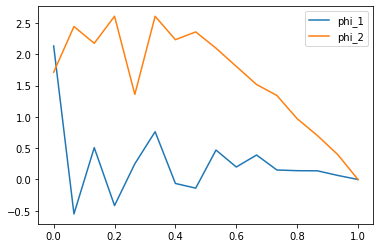

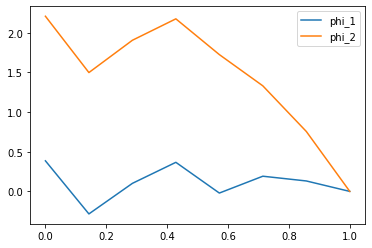

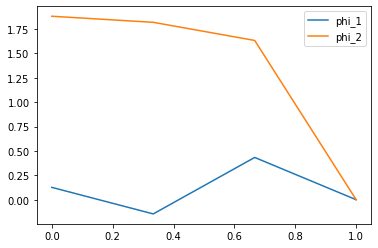

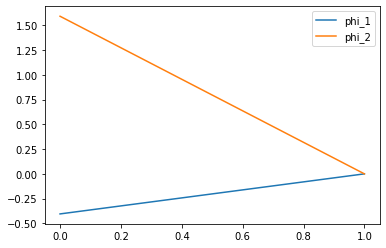

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the objective functions
def phi_1(x):
    return (x * (1 - x))

def phi_2(x):
    return (2 + 2 * x * (1 - 2 * x) + (1 / 50) * np.sin(52 * np.pi * x))

# Define the Gaussian noise function
def mu(x):
    return (np.random.normal(0, (1 - x) ** 2))

# Define the partitioning function
def repartition(m):
    # Generate a list of m evenly spaced points in the unit interval
    points = np.linspace(0, 1, m)
    # Calculate the value of the objective function at each point
    values_1 = phi_1(points)
    values_2 = phi_2(points)
    # Add Gaussian noise to the values of the second objective function
    noisy_values_2 = values_2 + mu(points)
    noisy_values_1= values_1 + mu(points)

    # Plot the objective functions
    plt.plot(points, noisy_values_1, label="phi_1")
    plt.plot(points, noisy_values_2, label="phi_2")
    plt.legend()
    plt.show()

# Partition the unit interval into 16 equal parts
m = 16
repartition(m)

# Repartition the unit interval when H(t) = 1/2 * H(0)
m1 = int(m/2)
repartition(m1)

# Repartition the unit interval again when H(t)<1/2*H(0)
m2 = int(m1/2)
repartition(m2)

# Repartition the unit interval again when H(t
m3= int(m2/2)
repartition(m3)

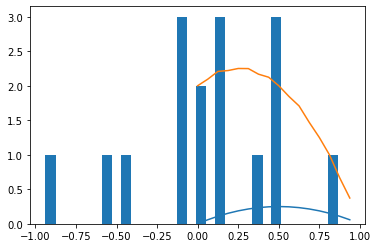

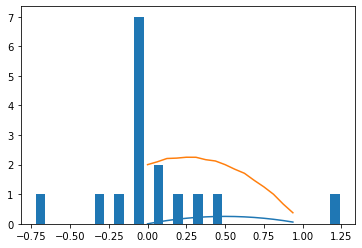

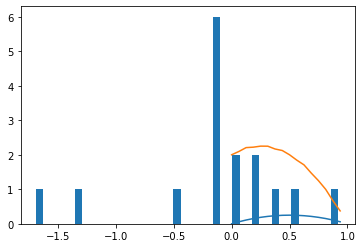

In [41]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# Objective function 1: phi(x) = x * (1 - x)
def phi1(x):
  return x * (1 - x)

# Objective function 2: phi(x) = 2 + 2x * (1 - 2x) + (1/50) * sin(52 * math.pi * x)
def phi2(x):
  return 2 + 2 * x * (1 - 2 * x) + (1/50) * math.sin(52 * math.pi * x)

# Repartition the unit interval into m equal parts
def repartition(m):
  partitions = []
  for i in range(m):
    partitions.append((i/m, (i+1)/m))
  return partitions

# Gaussian noise with mean 0 and variance (1 - x)^2
def gaussian_noise(x):
  mean = 0
  variance = (1 - x)**2
  return np.random.normal(mean, variance)

# Repartition the unit interval m times
m = 16  # Initial number of partitions
for i in range(3):
  partitions = repartition(m)

  # Compute the values of the objective functions
  x1 = [partition[0] for partition in partitions]
  y1 = [phi1(x) for x in x1]
  y2 = [phi2(x) for x in x1]

  # Compute the histogram of the proposal distribution
  y, edges = np.histogram([gaussian_noise(x) for x in x1], bins=m)

  # Plot the objective functions against the histogram of the proposal distribution
  plt.plot(x1, y1)
  plt.plot(x1, y2)
  plt.bar(edges[:-1], y, width=1/m)
  plt.show()

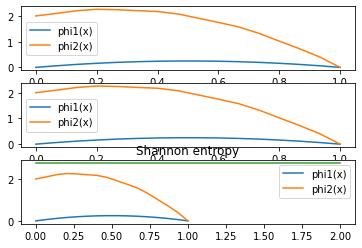

In [40]:
# Import matplotlib
import matplotlib.pyplot as plt

# Define the first objective function
def phi1(x):
    return x * (1 - x)

# Define the second objective function
def phi2(x):
    return 2 + 2 * x * (1 - 2 * x) + (1 / 50) * np.sin(52 * np.pi * x)

# Define the unit interval as x values for the plots
x = np.linspace(0, 1, 100)

# Define the initial partition
partition = np.linspace(0, 1, 16)

# Define the initial value of H(t)
Ht = 1

# Define the target value of H(t)
target = 1 / 2 * Ht

# Define a counter variable to track the number of repartitionings
counter = 0

# Create a figure with multiple subplots
fig, axs = plt.subplots(3, 1)

# Create a list to store the entropy values
entropy_values = []

# Continue until H(t) reaches the target value or the maximum number of repartitionings is reached
while Ht > target and counter < 3:
    # Repartition the unit interval
    partition = np.linspace(0, 1, 16)

    # Evaluate the objective functions at each point in the partition
    phi1_values = phi1(partition)
    phi2_values = phi2(partition)

    # Calculate the entropy of the objective functions
    entropy = np.log(16)

    # Store the entropy value in the list
    entropy_values.append(entropy)

    # Update the value of H(t)
    Ht = 5

    # Create the first plot
    axs[counter].plot(partition, phi1_values, label="phi1(x)")

    # Create the second plot
    axs[counter].plot(partition, phi2_values, label="phi2(x)")

    # Add a title to the plot
    #axs[counter].title("Repartitioning {}".format(counter + 1))

    # Add a legend to the plot
    axs[counter].legend()

    # Increment the counter
    counter += 1

# Create a new plot to show the entropy values
plt.plot(entropy_values)

# Add a title to the plot
plt.title("Shannon entropy")

# Show the figure
plt.show()
